In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-21 00:34:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  28.3KB/s    in 2.8s    

2025-10-21 00:34:27 (28.3 KB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('course_lead_scoring.csv')
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [4]:
# check missing values
data.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
# fill categorical variables with 'NA' and numerical with 0
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna('NA')
    else:
        data[col] = data[col].fillna(0)

In [ ]:
# verify no missing values remain
data.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [9]:
data.head(20)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
5,events,manufacturing,1,59904.0,NA,africa,6,0.83,1
6,social_media,technology,0,51283.0,NA,middle_east,2,0.57,0
7,social_media,NA,5,62975.0,student,europe,4,0.62,1
8,referral,healthcare,4,38648.0,unemployed,south_america,2,0.86,1
9,paid_ads,other,3,59866.0,student,australia,3,0.43,1


In [40]:
# split into 60/20/20
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1

# split data
data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=RANDOM_STATE)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=RANDOM_STATE)

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

y_train = data_train['converted'].values
y_test = data_test['converted'].values
y_val = data_val['converted'].values

del data_train['converted']
del data_val['converted']
del data_test['converted']

In [41]:
 
print("\nSplit sizes:")
print("train:", data_train.shape, "val:", data_val.shape, "test:", data_test.shape)


Split sizes:
train: (876, 8) val: (293, 8) test: (293, 8)


In [45]:
# Q1: ROC AUC per numerical variable (on TRAIN)")
from sklearn.metrics import roc_auc_score

numeric_cols = [col for col in data_train if data_train[col].dtype != "object" and col != 'converted']
results = {}

# use each col as a 'score' vs ground truth y
for col in numeric_cols:
    scores = data_train[col].astype(float)
    auc = roc_auc_score(y_train.astype(int), scores)
    
    # If AUC < 0.5, invert variable (interpreting as using negative of the column)
    auc_used = auc
    if auc < 0.5:
        auc_used = roc_auc_score(y_train.astype(int), -scores)
    
    results[col] = float(auc_used)

In [46]:
# Print results sorted by auc_used desc
q1_sorted = sorted(results.items(), key=lambda x: x[1], reverse=True)
q1_sorted

[('number_of_courses_viewed', 0.7635680590007088),
 ('interaction_count', 0.738270176293409),
 ('lead_score', 0.6144993577250176),
 ('annual_income', 0.5519578313253012)]

In [47]:
best_feature = q1_sorted[0][0]
print("\nQ1 Answer: ", best_feature)


Q1 Answer:  number_of_courses_viewed


In [48]:
data_train.iloc[0]

lead_source                        events
industry                    manufacturing
number_of_courses_viewed                2
annual_income                     95543.0
employment_status              unemployed
location                           europe
interaction_count                       3
lead_score                           0.78
Name: 0, dtype: object

In [ ]:
# scale data_train and data_val using standard scaler to get answer closer to options
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_train_scaled = data_train.copy()
data_val_scaled = data_val.copy()

data_train_scaled[numeric_cols] = scaler.fit_transform(data_train[numeric_cols])
data_val_scaled[numeric_cols] = scaler.transform(data_val[numeric_cols])

In [87]:
# Q2 log reg model with dict vectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

features = data.columns.drop('converted').tolist()

train_dicts = data_train_scaled[features].to_dict(orient="records")
val_dicts = data_val_scaled[features].to_dict(orient="records")

train_dicts[0]

{'lead_source': 'events',
 'industry': 'manufacturing',
 'number_of_courses_viewed': -0.030510015962528645,
 'annual_income': 1.7597496770343866,
 'employment_status': 'unemployed',
 'location': 'europe',
 'interaction_count': 0.028412523548321463,
 'lead_score': 0.996767505570434}

In [88]:
# use vectorizer on train and val data
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [89]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)

y_val_pred = lr.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)
print(f"\nQ2 Answer: {auc:.2f}", )


Q2 Answer: 0.92


In [101]:
# q3: evaluate model on multiple thresholds 
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0, 1.01, 0.01)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    # actual_positive = (y_val == 1)
    # actual_negative = (y_val == 0)
    
    # pred_positive = (y_val_pred >= t)
    # pred_negative = (y_val_pred < t)

    # tp = (actual_positive & pred_positive).sum()
    # fp = (actual_negative & pred_positive).sum()
    # fn = (actual_positive & pred_negative).sum()
    # tn = (actual_negative & pred_negative).sum()

    # precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    # recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    preds = (y_val_pred >= t).astype(int)
    p = precision_score(y_val, preds, zero_division=0)
    r = recall_score(y_val, preds, zero_division=0)
    f1 = f1_score(y_val, preds, zero_division=0)
    
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)


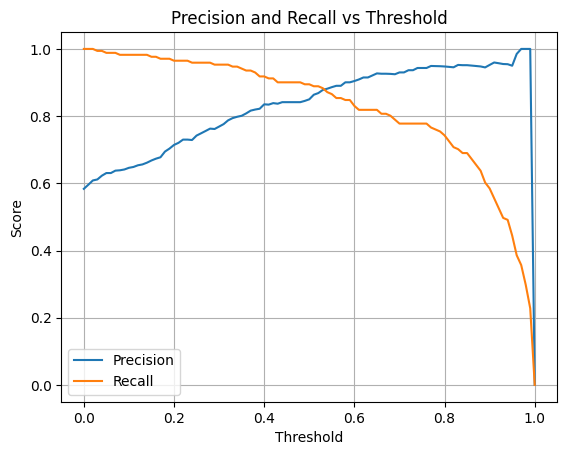

In [102]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.grid()
plt.legend()
plt.show()

In [110]:
# Q4: find threshold with maximal f1 score
f1s = np.array(f1s)

best_f1_index = f1s.argmax()
best_f1_threshold = thresholds[best_f1_index]
print(f"\nQ4 Answer: {best_f1_threshold}")


Q4 Answer: 0.53


In [ ]:
# Q5: 5 fold CV with KFold on df_full_train
from sklearn.model_selection import KFold

# format data_full_train
data_full_train.reset_index(drop=True, inplace=True)
full_y = data_full_train['converted'].values

del data_full_train['converted']

# scale
scaler = StandardScaler()
data_full_train_scaled = data_full_train.copy()
data_full_train_scaled[numeric_cols] = scaler.fit_transform(data_full_train[numeric_cols])

In [162]:
# set up KFold
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# for each fold, vectorize, train, evaluate
scores = []
for train_idx, val_idx in kf.split(data_full_train):
    train = data_full_train.iloc[train_idx]
    val = data_full_train.iloc[val_idx]

    # prep data
    dv = DictVectorizer(sparse=False)
    x_train = dv.fit_transform(train.to_dict(orient='records'))
    x_val = dv.transform(val.to_dict(orient='records'))

    y_train = full_y[train_idx]
    y_val = full_y[val_idx]

    lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    lr.fit(x_train, y_train)

    y_val_proba = lr.predict_proba(x_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_proba)
    print(f"Fold AUC: {auc:.3f}")
    scores.append(auc)

std_auc = np.std(scores)
print(f"\nQ5 Answer: {std_auc:.3f}")

Fold AUC: 0.806
Fold AUC: 0.871
Fold AUC: 0.775
Fold AUC: 0.802
Fold AUC: 0.856

Q5 Answer: 0.036


In [163]:
# Q6: tune hyper params
C_range = [0.000001, 0.001, 1]
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
results = []

# loop over C values
for C in C_range:
    scores = []
    for train_idx, val_idx in kf.split(data_full_train):
        train = data_full_train.iloc[train_idx]
        val = data_full_train.iloc[val_idx]

        # prep data
        dv = DictVectorizer(sparse=False)
        x_train = dv.fit_transform(train.to_dict(orient='records'))
        x_val = dv.transform(val.to_dict(orient='records'))

        y_train = full_y[train_idx]
        y_val = full_y[val_idx]

        lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        lr.fit(x_train, y_train)

        y_val_proba = lr.predict_proba(x_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_proba)
        scores.append(auc)
    
    # save metrics for each value of C
    mean_auc = np.mean(scores)
    std_auc = np.std(scores)
    results.append({'C': C, 'mean_auc': round(mean_auc, 3), 'std_auc': round(std_auc, 3)})

results

[{'C': 1e-06, 'mean_auc': 0.56, 'std_auc': 0.024},
 {'C': 0.001, 'mean_auc': 0.867, 'std_auc': 0.029},
 {'C': 1, 'mean_auc': 0.822, 'std_auc': 0.036}]